# Research Question 2: Segregation of Players based on their playing attributes.

In [238]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3

# Data Analysis and Preprocessing 

In [239]:
#load data
path='database.sqlite'
con=sqlite3.connect(path)
tables=pd.read_sql("""SELECT * FROM sqlite_master WHERE TYPE='table';""",con)
tables.head(len(tables.values))

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


The European Soccer database from kaggle has the above tables. The data is stored in these tables, in SQLite format. The tables are linked through primary keys.

In [240]:
countries = pd.read_sql_query("SELECT * from Country", con)
matches = pd.read_sql_query("SELECT * from Match", con)
leagues = pd.read_sql_query("SELECT * from League", con)
teams = pd.read_sql_query("SELECT * from Team", con)
team_attributes=pd.read_sql_query("SELECT * from Team_Attributes", con)
player=pd.read_sql_query("SELECT * from Player",con)
player_attributes=pd.read_sql_query("SELECT * from Player_Attributes",con)

Here, we're extracting the necessary tables of interest from the Database.

In [241]:
countries.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [242]:
countries=countries.set_index('id')
leagues=leagues.set_index('id')

In [243]:
countries_leagues=pd.read_sql("""SELECT Country.name AS Country_Name, league.name AS League_Name FROM Country,League WHERE Country.id=League.country_id;""",con)
countries_leagues.head(len(countries_leagues))

,Country_Name,League_Name
0,Belgium,Belgium Jupiler League
1,England,England Premier League
2,France,France Ligue 1
3,Germany,Germany 1. Bundesliga
4,Italy,Italy Serie A
5,Netherlands,Netherlands Eredivisie
6,Poland,Poland Ekstraklasa
7,Portugal,Portugal Liga ZON Sagres
8,Scotland,Scotland Premier League
9,Spain,Spain LIGA BBVA


Above are the 11 European countries and their Leading fifa leagues that we would be dealing with throughout this project.

In [244]:
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [245]:
matches.date = pd.to_datetime(matches.date)
matches_by_date=matches.sort_values(by='date')

In [246]:
matches.columns.values

array(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7',
       'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2',
       'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'aw

The matches dataframe/table has the historical data of matches, ranging from year 2008 to 2016, between teams in the leagues mention above. 

In [247]:
#matches in each season
latest_matches=matches.where(matches['date']>=np.datetime64('2015-01-01'))
latest_matches.isnull().sum()
latest_matches.drop(columns=['B365H',
       'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH',
       'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH',
       'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH',
       'BSD', 'BSA'],inplace=True)
latest_matches.drop(columns=['goal', 'shoton', 'shotoff',
       'foulcommit', 'card', 'cross', 'corner', 'possession'],inplace=True)

In this research question, I am not concerned with the match statistics and betting odds of bookies, so I am dropping the irrelevant columns in the above cell. Also, for analysis, I am filtering out the matches player in years 2015-16.

In [248]:


latest_matches.dropna(inplace=True)
latest_matches.isnull().sum()
#latest_matches.head()
#latest_matches.shape
latest_matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
1354,1355.0,1.0,1.0,2014/2015,21.0,2015-02-03,1717979.0,9987.0,8573.0,1.0,...,280033.0,36832.0,149334.0,173462.0,186284.0,208985.0,38365.0,288784.0,265123.0,68114.0
1360,1361.0,1.0,1.0,2014/2015,22.0,2015-01-16,1717985.0,8342.0,8203.0,1.0,...,21753.0,396929.0,140932.0,150968.0,38956.0,67896.0,300977.0,173957.0,241501.0,240044.0
1361,1362.0,1.0,1.0,2014/2015,22.0,2015-01-18,1717986.0,8635.0,9989.0,3.0,...,426892.0,157249.0,45485.0,280134.0,149258.0,164135.0,389202.0,75405.0,36863.0,427980.0
1362,1363.0,1.0,1.0,2014/2015,22.0,2015-01-17,1717987.0,8573.0,8571.0,1.0,...,95615.0,156693.0,157375.0,181312.0,37065.0,95614.0,166670.0,131530.0,167057.0,104377.0
1363,1364.0,1.0,1.0,2014/2015,22.0,2015-01-17,1717988.0,9986.0,9984.0,0.0,...,38789.0,466157.0,466443.0,37889.0,38786.0,41463.0,190854.0,147732.0,150240.0,431589.0


In the following cells, we are figuring out the home and away team's line up in the 101th match  played in year 2015. It's a lot of code as the data is stored in sql format.

In [249]:
player_position_columns=['home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7',
       'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2',
       'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_player_Y9', 'away_player_Y10',
       'away_player_Y11']

player_positions=latest_matches[player_position_columns]
player_positions.head()

home_player_positions_columns=['home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7',
       'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11','home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11']
home_player_positions=player_positions[home_player_positions_columns]

away_player_positions_columns=['away_player_X1', 'away_player_X2',
       'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11','away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_player_Y9', 'away_player_Y10',
       'away_player_Y11']
away_player_positions=player_positions[away_player_positions_columns]


In [250]:
home_player_positions.head()

,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,...,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11
1354,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,...,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0
1360,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,3.0,5.0,...,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,10.0
1361,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,3.0,5.0,...,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,10.0
1362,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,3.0,5.0,...,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,10.0
1363,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,...,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0


In [251]:
#Home team configuration for 100th match in 2015
len(home_player_positions.iloc[100].values)

for i in range(0,11):
    print((home_player_positions.iloc[100].values[i],home_player_positions.iloc[100].values[i+11]))

(1.0, 1.0)
(2.0, 3.0)
(4.0, 3.0)
(6.0, 3.0)
(8.0, 3.0)
(3.0, 7.0)
(5.0, 7.0)
(7.0, 7.0)
(3.0, 10.0)
(5.0, 10.0)
(7.0, 10.0)


Home team's line-up 1-3-5-2

In [252]:
#Away team configuration for 100th match in 2015
len(away_player_positions.iloc[100].values)

for i in range(0,11):
    print((away_player_positions.iloc[100].values[i],away_player_positions.iloc[100].values[i+11]))

(1.0, 1.0)
(2.0, 3.0)
(4.0, 3.0)
(6.0, 3.0)
(8.0, 3.0)
(3.0, 7.0)
(5.0, 7.0)
(7.0, 7.0)
(3.0, 10.0)
(5.0, 10.0)
(7.0, 10.0)


Away team's line-up 1-4-2-3-1

In [253]:
player_positions.iloc[0]

home_player_X1      1.0
home_player_X2      2.0
home_player_X3      4.0
home_player_X4      6.0
home_player_X5      8.0
home_player_X6      4.0
home_player_X7      6.0
home_player_X8      3.0
home_player_X9      5.0
home_player_X10     7.0
home_player_X11     5.0
away_player_X1      1.0
away_player_X2      2.0
away_player_X3      4.0
away_player_X4      6.0
away_player_X5      8.0
away_player_X6      2.0
away_player_X7      4.0
away_player_X8      6.0
away_player_X9      8.0
away_player_X10     4.0
away_player_X11     6.0
home_player_Y1      1.0
home_player_Y2      3.0
home_player_Y3      3.0
home_player_Y4      3.0
home_player_Y5      3.0
home_player_Y6      6.0
home_player_Y7      6.0
home_player_Y8      8.0
home_player_Y9      8.0
home_player_Y10     8.0
home_player_Y11    11.0
away_player_Y1      1.0
away_player_Y2      3.0
away_player_Y3      3.0
away_player_Y4      3.0
away_player_Y5      3.0
away_player_Y6      7.0
away_player_Y7      7.0
away_player_Y8      7.0
away_player_Y9  

In [254]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


The player table in the data-set is a collection of all the players playing in these leagues.

Following is the query for a detailed view of matches played between teams in all the seasons.

In [255]:
detailed_matches = pd.read_sql("""SELECT Match.id, 
                                        Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season, 
                                        stage, 
                                        date,
                                        HT.team_long_name AS  home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal, 
                                        away_team_goal                                        
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                ;""" ,con)
detailed_matches=pd.DataFrame(detailed_matches).set_index('id')

detailed_matches.head(len(detailed_matches.values))

,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
id,,,,,,,,,
1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KRC Genk,Beerschot AC,1,1
2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0
3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3
4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KAA Gent,RAEC Mons,5,0
5,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3
6,Belgium,Belgium Jupiler League,2008/2009,1,2008-09-24 00:00:00,KV Mechelen,Club Brugge KV,1,1
7,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KSV Roeselare,KV Kortrijk,2,2
8,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,Tubize,Royal Excel Mouscron,1,2
9,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KVC Westerlo,Sporting Charleroi,1,0


In [256]:
matches.dropna(inplace=True)

# KMeans Clustering

In the following cells, we are aggregating players' physical and playing attributes in the year 2015. 

In [257]:
#Data preprocessing

data=pd.read_sql("""SELECT  A1.player_name NAME, height, weight, overall_rating, potential, preferred_foot, attacking_work_rate, defensive_work_rate, crossing, finishing, heading_accuracy, short_passing, volleys, dribbling, curve, free_kick_accuracy, long_passing, ball_control, acceleration, sprint_speed, agility, reactions, balance, shot_power, jumping, stamina, strength, long_shots, aggression, interceptions, positioning, vision, penalties, marking, standing_tackle, sliding_tackle, gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes FROM Player A1 INNER JOIN Player_Attributes A2 ON A1.player_api_id = A2.player_api_id WHERE A2.date LIKE '2015%'""",con)

print ("Total rows 2015:", str(len(data)))
print ("Unique players 2015:", str(len(data["NAME"].unique())))

#I'm dropping rows which have 1 or more null values.
data = data.dropna()
unique = data["NAME"].unique() 
print ("Total rows after dropna:", str(len(data)))
print ("Unique players after dropna", str(len(data["NAME"].unique())))

Total rows 2015: 31834
Unique players 2015: 7414
Total rows after dropna: 31818
Unique players after dropna 7414


In [266]:
data.head()

,NAME,height,weight,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,182.88,187,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,Aaron Appindangoye,182.88,187,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
2,Aaron Appindangoye,182.88,187,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
3,Aaron Cresswell,170.18,146,73.0,75.0,left,high,medium,79.0,51.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
4,Aaron Cresswell,170.18,146,73.0,75.0,left,high,medium,79.0,51.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [267]:
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Since the data collected above has multiple updates of phyiscal and playing attributes of some players, in the year 2015,  in the below cell we are picking the latest updated record for each player.

In [260]:
unique = data["NAME"].unique()
dic = {}
for name in unique:
    row = data[data["NAME"]==name].iloc[[0]]
    name = row.iloc[0]["NAME"]
    height = row.iloc[0]["height"]
    weight = row.iloc[0]["weight"]
    overall_rating = row.iloc[0]["overall_rating"]
    potential= row.iloc[0]["potential"]
    crossing= row.iloc[0]["crossing"]
    finishing= row.iloc[0]["finishing"]
    heading_accuracy= row.iloc[0]["heading_accuracy"]
    short_passing= row.iloc[0]["short_passing"]
    volleys= row.iloc[0]["volleys"]
    dribbling= row.iloc[0]["dribbling"]
    curve= row.iloc[0]["curve"]
    free_kick_accuracy= row.iloc[0]["free_kick_accuracy"]
    long_passing= row.iloc[0]["long_passing"]
    ball_control= row.iloc[0]["ball_control"]
    acceleration= row.iloc[0]["acceleration"]
    sprint_speed= row.iloc[0]["sprint_speed"]
    agility= row.iloc[0]["agility"]
    reactions= row.iloc[0]["reactions"]
    balance= row.iloc[0]["balance"]
    shot_power= row.iloc[0]["shot_power"]
    jumping= row.iloc[0]["jumping"]
    stamina= row.iloc[0]["stamina"]
    strength= row.iloc[0]["strength"]
    long_shots= row.iloc[0]["long_shots"]
    aggression= row.iloc[0]["aggression"]
    interceptions= row.iloc[0]["interceptions"]
    positioning= row.iloc[0]["positioning"]
    vision= row.iloc[0]["vision"]
    penalties=row.iloc[0]["penalties"]
    marking= row.iloc[0]["marking"]
    standing_tackle= row.iloc[0]["standing_tackle"]
    sliding_tackle= row.iloc[0]["sliding_tackle"]
    gk_diving=row.iloc[0]["gk_diving"]
    gk_handling= row.iloc[0]["gk_handling"]
    gk_kicking= row.iloc[0]["gk_kicking"]
    gk_positioning= row.iloc[0]["gk_positioning"]
    gk_reflexes = row.iloc[0]["gk_reflexes"]
    vector = (height, weight, overall_rating,
              potential, crossing, finishing, heading_accuracy, short_passing, volleys,
              dribbling, curve, free_kick_accuracy, long_passing, ball_control,
              acceleration, sprint_speed, agility, reactions, balance, shot_power,
              jumping, stamina, strength, long_shots, aggression, interceptions,
              positioning, vision, penalties, marking, standing_tackle, sliding_tackle,
              gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes)

    dic[name] = vector
    
print ("Final number of players:", len(dic))

Final number of players: 7414


In [261]:
#names=list(dic.keys())
#attributes=list(dic.values())
import numpy as np
print(np.array(list(dic.values())))
training_data=np.array(list(dic.values()))
training_data.shape


[[182.88 187.    67.   ...  10.     8.     8.  ]
 [170.18 146.    73.   ...   9.     9.    12.  ]
 [170.18 163.    66.   ...  12.     9.    13.  ]
 ...
 [180.34 159.    64.   ...  12.     8.     8.  ]
 [190.5  172.    75.   ...  12.    10.     8.  ]
 [182.88 168.    73.   ...  11.     8.    12.  ]]


(7414, 37)

# Learning algorithm.

In the following cells, we are using KMeans unspervised clustering algorithm to cluster players based on the attributes provided in the training data.

In [262]:
from sklearn.preprocessing import minmax_scale as scaler
scaled_training_data=scaler(training_data,feature_range=(0,1),copy=True,axis=0)
print(np.sum(scaled_training_data[:][1],axis=0))
print(np.sum(training_data[:][1]))

21.455049063294236
2431.1800000000003


In [263]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
prediction=model.fit_predict(scaled_training_data)
print(prediction)


[0 1 2 ... 2 0 0]


In [272]:
#Players and their categories as predicted by our learning algorithm.

category={}
for i in range(0,len(dic.keys())):
    category[list(dic.keys())[i]]=prediction[i]

#print(category)
print(category)

{'Aaron Appindangoye': 2, 'Aaron Cresswell': 6, 'Aaron Doran': 0, 'Aaron Galindo': 4, 'Aaron Hughes': 8, 'Aaron Hunt': 9, 'Aaron Kuhl': 2, 'Aaron Lennon': 9, 'Aaron Meijers': 6, 'Aaron Mooy': 1, 'Aaron Niguez': 9, 'Aaron Ramsey': 1, 'Aaron Splaine': 0, 'Aaron Taylor-Sinclair': 2, 'Aaron Wilbraham': 7, 'Aatif Chahechouhe': 9, 'Abdelaziz Barrada': 9, 'Abdelhamid El Kaoutari': 4, 'Abdelkader Ghezzal': 7, 'Abdelmalek El Hasnaoui': 0, 'Abderrazak Jadid': 5, 'Abdou Diallo': 8, 'Abdou Traore': 5, 'Abdoul Ba': 8, 'Abdoul Karim Yoda': 5, 'Abdoul Razzagui Camara': 9, 'Abdoulay Konko': 1, 'Abdoulaye Ba': 4, 'Abdoulaye Bamba': 2, 'Abdoulaye Diaby': 9, 'Abdoulaye Diallo Sadio,22': 9, 'Abdoulaye Diallo': 3, 'Abdoulaye Doucoure': 1, 'Abdoulaye Keita': 2, 'Abdoulaye Meite': 8, 'Abdoulaye Toure': 4, 'Abdoulwahid Sissoko': 6, 'Abdul Aziz Tetteh': 6, 'Abdul Majeed Waris': 9, 'Abdul Osman': 2, 'Abdul Rahman Baba': 6, 'Abdullah Al Hafith': 8, 'Abdullahi Shehu': 6, 'Abel Aguilar': 1, 'Abel Gomez': 5, 'Abel 

[9985.986139576986, 6102.8810061271615, 4346.702087116098, 3564.3320366191424, 3285.538981865932, 3080.5878468015217, 2921.529343894349, 2802.0338745885724, 2708.806788293193, 2631.5739868237533]


Text(0, 0.5, 'Error')

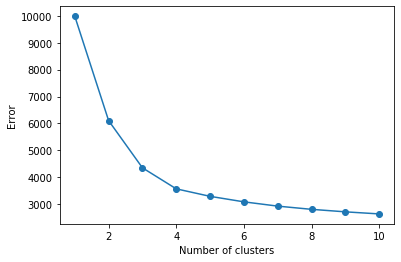

In [273]:
#We have chosen k=5, using the elbow method. 

from matplotlib import pyplot as plt
error=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,init='random',n_init=10,max_iter=3000,tol=1e-04,random_state=0)
    prediction=model.fit_predict(scaled_training_data)
    error.append(model.inertia_)

print(error)
plt.plot(range(1,11),error,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Error')

In [274]:
#After-thought 

fav_player=player.where(player['player_name']=='Lionel Messi')
fav_player.dropna(inplace=True)
fav_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
6169,6176.0,30981.0,Lionel Messi,158023.0,1987-06-24 00:00:00,170.18,159.0


The European soccer dataset does not have any records relevant to the players' valuation, so we had to scrape the data from sofifa.com to obtain these records. The newly obtained data is in Sraped Data.csv file.

In [275]:
#Scraped data 
new_data=pd.read_csv('Scraped Data.csv')
new_data.shape

C:\Users\Vamsi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (71) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(18547, 72)

In [276]:
classes=[0,1,2,3,4]
class_players=[]
for i in classes:
    each_category=[]
    for j in category:
        if category[j]==i:
            each_category.append(j)
        
    class_players.append(each_category)
    

#print(class_players)
print(len(class_players))

5


In [278]:
print('Number of Class one players- '+str(len(class_players[0])))
print('Class one players- '+str(class_players[0]))

Number of Class one players- 747
Class one players- ['Aaron Doran', 'Aaron Splaine', 'Abdelmalek El Hasnaoui', 'Abel Khaled', 'Abiola Dauda', 'Aboubakar Kamara', 'Aboubakar Oumarou', 'Achille Vaarnold', 'Adam Armstrong', 'Adam Campbell', 'Adam Morgan', 'Adam Ryczkowski', 'Adam Taggart', 'Adama Ba', 'Adrian Blad', 'Adrian Nikci', 'Adrien Hunou', 'Ahmed Hamoudi', 'Aidan Connolly', 'Akaki Gogia', 'Alan Gow', 'Alberto Perea', 'Aldair', 'Aldin Turkes', 'Aldo Kalulu', 'Alec Luyckx', 'Aleksandar Cavric', 'Alessandro Cerigioni', 'Alessandro Piu', 'Alessandro Sgrigna', 'Alessio Da Cruz', 'Alex Harris', 'Alex Henshall', 'Alex Iwobi', 'Alex Schalk', 'Alexandre Alphonse', 'Alexandre Bonnet', 'Alexandre Silva', 'Alexis Alegue Elandi', 'Alharbi El Jadeyaoui', "Ali M'Madi", 'Ali Messaoud', 'Allan Saint-Maximin', 'Alois Confais', 'Alvarinho', 'Alvaro Garcia', 'Alvaro Gimenez', 'Alvaro Vadillo', 'Amin Affane', 'Anas Tahiri', 'Anastasios Donis', 'Anatole Ngamukol', 'Andre Bukia', 'Andrea Mutombo', 'Andr

In [279]:
print('Number of Class two players- '+str(len(class_players[1])))
print('Class two players- '+str(class_players[1]))

Number of Class two players- 652
Class two players- ['Aaron Mooy', 'Aaron Ramsey', 'Abdoulay Konko', 'Abdoulaye Doucoure', 'Abel Aguilar', 'Abou Diaby', 'Adam Hlousek', 'Adil Hermach', 'Adriano', 'Adrien Rabiot', 'Adrien Regattin', 'Adrien Silva', 'Adrien Thomasson', 'Adrien Trebel', 'Ahmed El Mohamady', 'Alain Traore', 'Alan', 'Albert Riera', 'Alberto Aquilani', 'Alberto Zapater', 'Albin Ekdal', 'Aleix Vidal', 'Alejandro Bedoya', 'Alejandro Faurlin', 'Aleksandar Kolarov', 'Alessandro Florenzi', 'Alessandro Gazzi', 'Alex Lopez', 'Alex Sandro', 'Alex Telles', 'Alexander Buettner', 'Alexander Farnerud', 'Alexander Meier', 'Alexander Ring', 'Alexander Tettey', 'Alexandros Tziolis', 'Ali Adnan', 'Allan', 'Alvaro Gonzalez', 'Alvaro Pereira', 'Ander Herrera', 'Ander Iturraspe', 'Anders Christiansen', 'Anders Konradsen', 'Anderson Talisca', 'Andoni Iraola', 'Andre Andre', 'Andre Ayew', 'Andre Castro', 'Andre Gomes', 'Andre Hahn', 'Andrea Bertolacci', 'Andrea Lazzari', 'Andrea Poli', 'Andreas 

In [280]:
print('Number of Class three players- '+str(len(class_players[2])))
print('Class three players- '+str(class_players[2]))

Number of Class three players- 783
Class three players- ['Aaron Appindangoye', 'Aaron Kuhl', 'Aaron Taylor-Sinclair', 'Abdoulaye Bamba', 'Abdoulaye Keita', 'Abdul Osman', 'Abel Tamata', 'Adam Danch', 'Adam Deja', 'Adam Drury', 'Adam Dzwigala', 'Adam Henley', 'Adam King', 'Adam Mojta', 'Adam Pazio', 'Adrian Basta', 'Adrian Daniel Calello', 'Adrian Klepczynski', 'Adrian Mariappa', 'Adrian Marin', 'Adrian Rakowski', 'Adrien Rawyler', 'Ahmed Apimah Barusso', 'Alassane Diallo', 'Alassane Tambe', 'Albert Rafetraniaina', 'Alberto Guitian', 'Aleksandar Kovacevic', 'Aleksandar Miljkovic', 'Aleksandar Todorovski', 'Aleksandrs Fertovs', 'Alessandro Agostini', 'Alessandro Crescenzi', 'Alessandro Lambrughi', 'Alex Baptiste', 'Alex Kakuba', 'Alexander Corryn', 'Alexander Djiku', 'Alexandre Raineau', 'Alexis De Sart', 'Alexis Norambuena Ruz', 'Ali Yasar', 'Almamy Toure', 'Amara Baby', 'Amine Linganzi', 'Andre Anguissa', 'Andre Bikey', 'Andre Blackman', 'Andre Hainault', 'Andrea Conti', 'Andrea Rossi'

In [281]:
print('Number of Class four players- '+str(len(class_players[3])))
print('Class four players- '+str(class_players[3]))

Number of Class four players- 631
Class four players- ['Abdoulaye Diallo', 'Achille Coser', 'Adam Bogdan', 'Adam Collin', 'Adam Federici', 'Adrian', 'Adriano Facchini', 'Alan Mannus', 'Alan Martin', 'Albano Benjamin Bizzarri', 'Alberto Brignoli', 'Alberto Cifuentes', 'Alberto Frison,18', 'Alberto Garcia', 'Alberto Pelagotti', 'Alberto Pomini', 'Alessandro Damen', 'Alessandro Iacobucci', 'Alessio Cragno', 'Alex Manninger', 'Alex McCarthy', 'Alex Valentini', 'Alexander Schwolow', 'Alexander Stephan', 'Alexandre Letellier', 'Alexis Thebaux', 'Ali Ahamada', 'Ali Al-Habsi', 'Alireza Haghighi', 'Allan McGregor', 'Alphonse Areola', 'Anders Lindegaard', 'Andre Moreira', 'Andrea Consigli', 'Andrea Seculin', 'Andreas Hirzel', 'Andreas Isaksson', 'Andreas Luthe', 'Andres Fernandez', 'Andres Malloth', 'Andris Vanins', 'Andrzej Witan', 'Angelo da Costa', 'Anthony Favre', 'Anthony Lopes', 'Anthony Moris', 'Anton Mitryushkin', 'Antonio Adan', 'Antonio Donnarumma', 'Antonio Mirante', 'Antonio Reguero 

In [282]:
print('Number of Class five players- '+str(len(class_players[4])))
print('Class five players- '+str(class_players[4]))

Number of Class five players- 683
Class five players- ['Aaron Galindo', 'Abdelhamid El Kaoutari', 'Abdoulaye Ba', 'Abdoulaye Toure', 'Adam Masina', 'Adam Pinter', 'Aderlan Santos', 'Adil Auassar', 'Adil Rami', 'Alaeddine Yahia', 'Alan Henrique', 'Alberto Botia', 'Alberto Lopo', 'Alef', 'Alejandro Arribas', 'Alejandro Galvez', 'Aleksandar Pantic', 'Alessandro Gamberini', 'Alessio Romagnoli', 'Alexander Madlung', 'Alexander Milosevic', 'Alexander Scholz', 'Alexis', "Alfred N'Diaye", 'Ali Ghazal', 'Aljaz Struna', 'Alou Diarra', 'Alvaro Dominguez', 'Alvaro Gonzalez Soberon', 'Amos Youga', 'Anderson Esiti', 'Anderson', 'Andre Hoffmann', 'Andre Leao', 'Andre Pinto', 'Andre Vilas Boas', 'Andre Wisdom', 'Andrea Barzagli', 'Andrea Costa', 'Andrea Mantovani', 'Andrea Masiello', 'Andrea Raggi', 'Andrea Ranocchia', 'Andreas Bjelland', 'Andreas Granqvist', 'Andreas Johansson', 'Andreu Fontas', 'Angel Trujillo', 'Angelo Obinze Ogbonna', 'Anthony Weber', 'Antoine Conte', 'Antolin Alcaraz', 'Anton Fer

Looking closely, we have observed that the algorithm has clustered the players based on their playing positions.

**Note: The playing position was not a feature on which the algorithm was trained. Infact, our data-set does not have this feature.**

In [283]:
names=list(category.keys())
len(names)

7414

In [188]:
#Again an after-thought :)
new_data.iloc[list((new_data['Name']=='Lionel Messi').values)].at[0,'Value']

#newer_data=new_data.set_index('Name')
#newer_data
#newer_data.iloc['Lionel Messi']
#list((new_data['Name']=='Lionel Messi').values)

'€95.5M'

In [284]:
#Still we do not have valuations of all the players so had to filter out the players for which we have data.
#new_data['Name'].values
players_with_valuations=[]
for i in names:
    if i in list(new_data['Name'].values):
        players_with_valuations.append(i)

print(len(players_with_valuations))
print(players_with_valuations)
#print('Lionel Messi' in players_with_valuations)

2255
['Aaron Appindangoye', 'Aaron Cresswell', 'Aaron Hunt', 'Aaron Lennon', 'Aaron Meijers', 'Aaron Mooy', 'Aaron Ramsey', 'Aaron Wilbraham', 'Aatif Chahechouhe', 'Abdelhamid El Kaoutari', 'Abdou Diallo', 'Abdoul Ba', 'Abdoulaye Ba', 'Abdoulaye Bamba', 'Abdoulaye Diallo', 'Abdoulaye Keita', 'Abdul Rahman Baba', 'Abdullah Al Hafith', 'Abel Aguilar', 'Aboubakar Kamara', 'Achraf Lazaar', 'Adam Armstrong', 'Adam Bodzek', 'Adam Buksa', 'Adam Collin', 'Adam Danch', 'Adam Deja', 'Adam Federici', 'Adam Henley', 'Adam Lallana', 'Adam Le Fondre', 'Adam Maher', 'Adam Masina', 'Adam Matthews', 'Adam Ounas', 'Adam Rooney', 'Adam Ryczkowski', 'Adam Smith', 'Adam Taggart', 'Adama Soumaoro', 'Adel Taarabt', 'Adil Auassar', 'Adil Rami', 'Adnan Januzaj', 'Adrian Mariappa', 'Adrian Stoian', 'Adrian Winter', 'Adrien Hunou', 'Adrien Rabiot', 'Adrien Thomasson', 'Adrien Trebel', 'Afriyie Acquah', 'Agon Mehmeti', 'Ahmed El Messaoudi', 'Ahmed Kashi', 'Ahmed Musa', 'Aiden McGeady', 'Akaki Gogia', 'Alain Wiss'

In [289]:
count1=0
count2=0
count3=0
count4=0
count5=0
class_one_players=[]
class_two_players=[]
class_three_players=[]
class_four_players=[]
class_five_players=[]
for i in players_with_valuations:
    if i in class_players[0]:
        count1+=1
        class_one_players.append(i)
    elif i in class_players[1]:
        count2+=1
        class_two_players.append(i)
    elif i in class_players[2]:
        count3+=1
        class_three_players.append(i)
    elif i in class_players[3]:
        count4+=1
        class_four_players.append(i)
    else:
        count5+=1
        class_five_players.append(i)

print(count1)
print(count2)
print(count3)
print(count4)
print(count5)
print(count1+count2+count3+count4+count5)
print(class_five_players)


222
243
219
221
1350
2255
['Aaron Cresswell', 'Aaron Hunt', 'Aaron Lennon', 'Aaron Meijers', 'Aaron Wilbraham', 'Aatif Chahechouhe', 'Abdelhamid El Kaoutari', 'Abdou Diallo', 'Abdoul Ba', 'Abdoulaye Ba', 'Abdul Rahman Baba', 'Abdullah Al Hafith', 'Achraf Lazaar', 'Adam Bodzek', 'Adam Buksa', 'Adam Lallana', 'Adam Le Fondre', 'Adam Maher', 'Adam Masina', 'Adam Matthews', 'Adam Ounas', 'Adam Rooney', 'Adam Smith', 'Adama Soumaoro', 'Adel Taarabt', 'Adil Auassar', 'Adil Rami', 'Adnan Januzaj', 'Adrian Stoian', 'Adrian Winter', 'Afriyie Acquah', 'Agon Mehmeti', 'Ahmed El Messaoudi', 'Ahmed Kashi', 'Ahmed Musa', 'Aiden McGeady', 'Alain Wiss', 'Alan Uryga', 'Alassane Plea', 'Albert Bunjaku', 'Alberto Grassi', 'Alberto Paloschi', 'Albian Ajeti', 'Aleandro Rosi', 'Aleksandar Bjelica', 'Aleksandar Ignjovski', 'Aleksandar Trajkovski', 'Alessandro Diamanti', 'Alessandro Matri', 'Alessandro Rosina', 'Alessio Cerci', 'Alessio Romagnoli', 'Alex Bruce', 'Alex Ferrari', 'Alex MacDonald', 'Alex Oxlade-

In [286]:
player_valuations={}
player_ratings={}
count=0
for player_i in players_with_valuations:
    #print(new_data.iloc[list((new_data['Name']==player_i).values)].at[0,'Value'])
    
    #print(new_data.iloc[list((new_data['Name']==player_i).values)].values[0][14],new_data.iloc[list((new_data['Name']==player_i).values)].values[0][15],new_data.iloc[list((new_data['Name']==player_i).values)].values[0][16])
    value=new_data.iloc[list((new_data['Name']==player_i).values)].values[0][14][1:]
    wage=new_data.iloc[list((new_data['Name']==player_i).values)].values[0][15][1:]
    release_clause=new_data.iloc[list((new_data['Name']==player_i).values)].values[0][16][1:]
    valuations=[value,wage,release_clause]
    for i in range(0,len(valuations)):
        if valuations[i][-1]=='M':
            valuations[i]=float(valuations[i][:-1])*1000
        elif valuations[i][-1]=='K':
            valuations[i]=float(valuations[i][:-1])
        else:
            valuations[i]=float(valuations[i])
    
    player_valuations[player_i]=valuations
    
    #Overall rating
    player_ratings[player_i]=new_data.iloc[list((new_data['Name']==player_i).values)].values[0][4]
    
    
    count+=1

print(player_valuations)
print(player_ratings)
print(count)

{'Aaron Appindangoye': [900.0, 6.0, 1900.0], 'Aaron Cresswell': [6500.0, 63.0, 12400.0], 'Aaron Hunt': [6000.0, 16.0, 9600.0], 'Aaron Lennon': [4400.0, 30.0, 8300.0], 'Aaron Meijers': [650.0, 4.0, 943.0], 'Aaron Mooy': [7500.0, 46.0, 0.0], 'Aaron Ramsey': [25500.0, 140.0, 42100.0], 'Aaron Wilbraham': [90.0, 1.0, 158.0], 'Aatif Chahechouhe': [4400.0, 16.0, 8700.0], 'Abdelhamid El Kaoutari': [1000.0, 3.0, 1800.0], 'Abdou Diallo': [15500.0, 61.0, 31800.0], 'Abdoul Ba': [600.0, 2.0, 1100.0], 'Abdoulaye Ba': [3100.0, 6.0, 5300.0], 'Abdoulaye Bamba': [3300.0, 18.0, 6600.0], 'Abdoulaye Diallo': [1600.0, 8.0, 3200.0], 'Abdoulaye Keita': [375.0, 1.0, 684.0], 'Abdul Rahman Baba': [6500.0, 17.0, 0.0], 'Abdullah Al Hafith': [625.0, 8.0, 1100.0], 'Abel Aguilar': [2200.0, 2.0, 2900.0], 'Aboubakar Kamara': [3100.0, 25.0, 6200.0], 'Achraf Lazaar': [750.0, 1.0, 0.0], 'Adam Armstrong': [2900.0, 11.0, 6000.0], 'Adam Bodzek': [875.0, 15.0, 1600.0], 'Adam Buksa': [1200.0, 3.0, 1900.0], 'Adam Collin': [130.

In [287]:
#ratings of top twenty goalkeepers
import numpy as np
goal_keepers_ratings={}
#print(class_players[4])
for i in class_five_players:
    goal_keepers_ratings[i]=player_ratings[i]

#print(goal_keepers_ratings)

unique_ratings=list(np.unique(list(goal_keepers_ratings.values())))
top_twenty=sorted(unique_ratings,reverse=True)[:20]
ratings=list(goal_keepers_ratings.values())
names=list(goal_keepers_ratings.keys())
print(top_twenty)
#print(ratings)
#print(names)
top_twenty_gk_values={}
top_twenty_gk_wages={}
top_twenty_gk_rc={}

for rating in top_twenty:
    value_index=ratings.index(rating)
    player_name=names[value_index]
    top_twenty_gk_values[player_name]=player_valuations[player_name][0]
    top_twenty_gk_wages[player_name]=player_valuations[player_name][1]
    top_twenty_gk_rc[player_name]=player_valuations[player_name][2]

print(top_twenty_gk_values)
valuations_top_20=list(top_twenty_gk_values.values())
print(top_twenty_gk_wages)
print(top_twenty_gk_rc)

[94, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73]
{'Lionel Messi': 95500.0, 'Eden Hazard': 90000.0, 'Mohamed Salah': 80500.0, 'Antoine Griezmann': 69000.0, 'Christian Eriksen': 68000.0, 'Aymeric Laporte': 56500.0, 'Alexandre Lacazette': 46000.0, 'Andrew Robertson': 43500.0, 'Julian Brandt': 40500.0, 'Alessio Romagnoli': 32000.0, 'Andrea Belotti': 30000.0, 'Alassane Plea': 22000.0, 'Alex Oxlade-Chamberlain': 18500.0, 'Abdou Diallo': 15500.0, 'Adil Rami': 4900.0, 'Adama Soumaoro': 9500.0, 'Aaron Cresswell': 6500.0, 'Adam Ounas': 10500.0, 'Aaron Lennon': 4400.0, 'Afriyie Acquah': 4100.0}
{'Lionel Messi': 565.0, 'Eden Hazard': 470.0, 'Mohamed Salah': 240.0, 'Antoine Griezmann': 370.0, 'Christian Eriksen': 205.0, 'Aymeric Laporte': 195.0, 'Alexandre Lacazette': 165.0, 'Andrew Robertson': 125.0, 'Julian Brandt': 94.0, 'Alessio Romagnoli': 46.0, 'Andrea Belotti': 63.0, 'Alassane Plea': 41.0, 'Alex Oxlade-Chamberlain': 90.0, 'Abdou Diallo': 61.0, 'Adil Rami': 58.

[73, 76, 74, 68, 61, 72, 65, 78, 56, 63, 74, 60, 65, 68, 65, 74, 68, 74, 69, 66, 64, 62, 76, 64, 75, 63, 73, 76, 64, 58, 74, 56, 65, 62, 71, 69, 59, 61, 81, 65, 72, 74, 68, 70, 63, 67, 63, 64, 70, 72, 64, 78, 59, 70, 62, 78, 64, 63, 73, 75, 70, 72, 72, 65, 68, 86, 69, 70, 74, 68, 77, 73, 71, 74, 72, 71, 57, 55, 73, 76, 68, 68, 68, 66, 76, 70, 79, 65, 70, 66, 73, 68, 78, 73, 68, 71, 56, 84, 60, 68, 74, 72, 71, 72, 80, 82, 67, 71, 70, 92, 66, 71, 70, 65, 68, 60, 77, 80, 66, 71, 67, 66, 76, 70, 68, 63, 87, 65, 73, 65, 72, 69, 48, 74, 55, 64, 59, 67, 59, 59, 66, 82, 75, 69, 78, 75, 61, 68, 74, 78, 66, 73, 64, 80, 74, 78, 69, 71, 67, 62, 65, 67, 57, 72, 66, 63, 68, 69, 69, 66, 57, 68, 74, 49, 66, 65, 68, 69, 68, 63, 54, 77, 78, 73, 58, 68, 69, 78, 66, 68, 64, 83, 65, 54, 64, 64, 75, 74, 72, 65, 70, 71, 68, 58, 60, 66, 66, 61, 76, 72, 67, 73, 88, 78, 68, 59, 66, 60, 84, 73, 64, 69, 68, 68, 60, 66, 87, 57, 61, 78, 69, 70, 75, 68, 71, 62, 78, 70, 69, 68, 74, 74, 68, 77, 69, 68, 54, 67, 71, 70,

[64, 65, 53, 68, 70, 65, 63, 62, 75, 66, 62, 78, 59, 72, 60, 68, 74, 67, 57, 73, 68, 62, 60, 51, 78, 72, 63, 63, 71, 69, 61, 69, 61, 69, 62, 45, 68, 57, 56, 65, 66, 65, 53, 69, 60, 70, 67, 67, 69, 68, 52, 65, 64, 76, 59, 61, 59, 64, 71, 72, 60, 63, 63, 56, 64, 65, 72, 68, 67, 82, 68, 69, 63, 72, 60, 48, 70, 69, 67, 60, 68, 58, 70, 64, 60, 69, 61, 68, 61, 56, 66, 60, 64, 83, 72, 66, 61, 61, 58, 59, 78, 66, 65, 67, 69, 55, 51, 72, 74, 59, 67, 62, 64, 69, 53, 72, 68, 69, 70, 67, 80, 49, 64, 66, 69, 57, 67, 63, 58, 60, 62, 81, 77, 57, 64, 60, 65, 69, 55, 54, 60, 81, 63, 65, 69, 79, 53, 57, 67, 78, 67, 70, 60, 54, 63, 77, 58, 58, 54, 68, 67, 68, 66, 63, 56, 59, 50, 55, 62, 61, 61, 71, 65, 55, 58, 60, 63, 63, 65, 72, 58, 66, 73, 62, 66, 70, 59, 67, 65, 53, 82, 71, 58, 65, 64, 75, 72, 63, 65, 69, 57, 59, 66, 62, 56, 61, 66, 63, 67, 71, 63, 77, 64, 59, 65, 66, 58, 64, 72, 63, 63, 67]
[11, 7, 13, 14, 8, 16, 11, 13, 11, 10, 9, 7, 10, 11, 15, 8, 13, 14, 10, 14, 12, 9, 9, 8, 12, 13, 10, 12, 7, 9, 

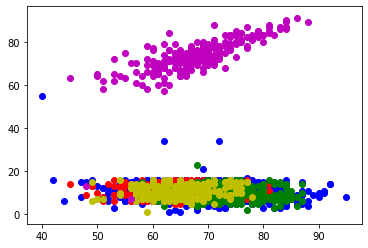

In [288]:
reactions=[]
reflexes=[]
for i in class_five_players:
    reactions.append(new_data.iloc[list((new_data['Name']==i).values)].values[0][33])
    reflexes.append(new_data.iloc[list((new_data['Name']==i).values)].values[0][57])

print(reactions)
print(reflexes)

reactions_defender=[]
reflexes_defender=[]

for i in class_one_players:
    reactions_defender.append(new_data.iloc[list((new_data['Name']==i).values)].values[0][33])
    reflexes_defender.append(new_data.iloc[list((new_data['Name']==i).values)].values[0][57])

print(reactions_defender)
print(reflexes_defender)

#from matplotlib import pyplot as plt
#plt.scatter(reactions,reflexes,color='b')
#plt.scatter(reactions_defender,reflexes_defender,color='r')



defensive_midfielder_reactions=[]
defensive_midfielder_reflexes=[]

for i in class_two_players:
    defensive_midfielder_reactions.append(new_data.iloc[list((new_data['Name']==i).values)].values[0][33])
    defensive_midfielder_reflexes.append(new_data.iloc[list((new_data['Name']==i).values)].values[0][57])
print(defensive_midfielder_reactions)
print(defensive_midfielder_reflexes)


attacking_midfielder_reactions=[]
attacking_midfielder_reflexes=[]
for i in class_three_players:
    attacking_midfielder_reactions.append(new_data.iloc[list((new_data['Name']==i).values)].values[0][33])
    attacking_midfielder_reflexes.append(new_data.iloc[list((new_data['Name']==i).values)].values[0][57])

striker_reactions=[]
striker_reflexes=[]
for i in class_four_players:
    striker_reactions.append(new_data.iloc[list((new_data['Name']==i).values)].values[0][33])
    striker_reflexes.append(new_data.iloc[list((new_data['Name']==i).values)].values[0][57])




from matplotlib import pyplot as plt
plt.scatter(reactions,reflexes,color='b')
plt.scatter(reactions_defender,reflexes_defender,color='r')
plt.scatter(defensive_midfielder_reactions,defensive_midfielder_reflexes,color='g')
plt.scatter(attacking_midfielder_reactions,attacking_midfielder_reflexes,color='y')
plt.scatter(striker_reactions,striker_reflexes,color='m')

33
57


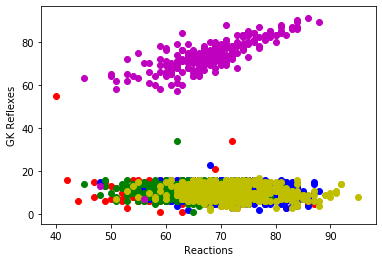

In [230]:
#Evaluation of the algorithm. As we couldn't think of a method to  

from matplotlib import pyplot as plt
def plot_2D(x_label,y_label):
    x_data_index=list(new_data.columns.values).index(x_label)
    y_data_index=list(new_data.columns.values).index(y_label)
    
    print(x_data_index)
    print(y_data_index)
    
    class_one_x=[]
    class_one_y=[]
    class_two_x=[]
    class_two_y=[]
    class_three_x=[]
    class_three_y=[]
    class_four_x=[]
    class_four_y=[]
    class_five_x=[]
    class_five_y=[]
    
    for i in class_one_players:
        class_one_x.append(new_data.iloc[list((new_data['Name']==i).values)].values[0][x_data_index])
        class_one_y.append(new_data.iloc[list((new_data['Name']==i).values)].values[0][y_data_index])
        
    for i in class_two_players:
        class_two_x.append(new_data.iloc[list((new_data['Name']==i).values)].values[0][x_data_index])
        class_two_y.append(new_data.iloc[list((new_data['Name']==i).values)].values[0][y_data_index])
    
    for i in class_three_players:
        class_three_x.append(new_data.iloc[list((new_data['Name']==i).values)].values[0][x_data_index])
        class_three_y.append(new_data.iloc[list((new_data['Name']==i).values)].values[0][y_data_index])
    
    for i in class_four_players:
        class_four_x.append(new_data.iloc[list((new_data['Name']==i).values)].values[0][x_data_index])
        class_four_y.append(new_data.iloc[list((new_data['Name']==i).values)].values[0][y_data_index])
    
    for i in class_five_players:
        class_five_x.append(new_data.iloc[list((new_data['Name']==i).values)].values[0][x_data_index])
        class_five_y.append(new_data.iloc[list((new_data['Name']==i).values)].values[0][y_data_index])
    
    
    plt.scatter(class_one_x,class_one_y,color='r')
    plt.scatter(class_two_x,class_two_y,color='b')
    plt.scatter(class_three_x,class_three_y,color='g')
    plt.scatter(class_four_x,class_four_y,color='y')
    plt.scatter(class_five_x,class_five_y,color='m')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
plot_2D('Reactions','GK Reflexes')
    

In these two dimensions(reflexes, reactions), clearly the goalkeepers are clustered away from the rest of the lot. Lets further explore the dimensions where the overlapped regions in the above graph are clustered apart.

43
50


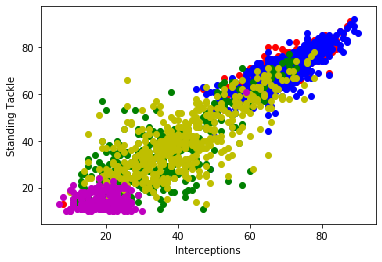

In [231]:
plot_2D('Interceptions','Standing Tackle')


39
51


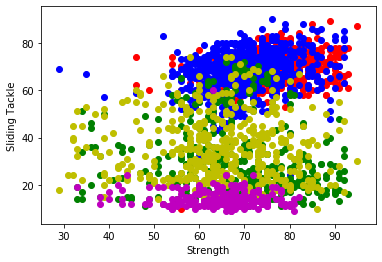

In [232]:
plot_2D('Strength','Sliding Tackle')


23
24


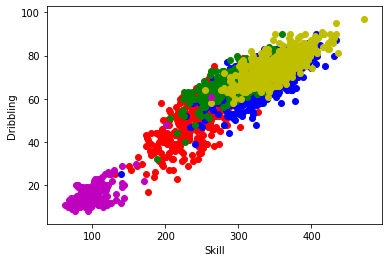

In [233]:
plot_2D('Skill','Dribbling')


20
19


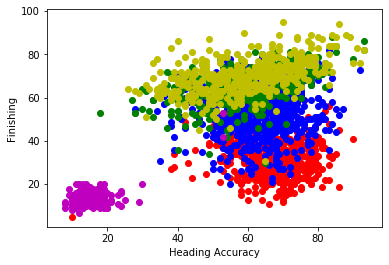

In [235]:
plot_2D('Heading Accuracy','Finishing')
`

Based on this analysis, we can say that the players are clustered apart. Since, the data is multi-dimensional it's hard to plot the clusters in a single 2-Dimensional plane, but on close analysis of the above graphs we can see that for some pairs of dimensions, the clusters are apart.

# Result:

In the below scattered plot, I have analysed the player valuations of class five players, which we have verified to be a class of goal keepers. In the graph, I have plotted the values of each player against their ratings. 

Text(0, 0.5, 'Value')

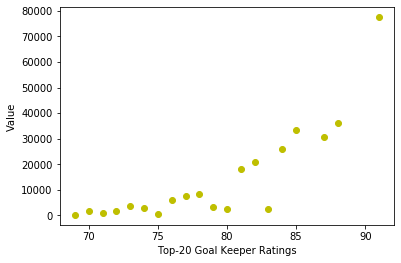

In [207]:
from matplotlib import pyplot as plt
plt.scatter(top_twenty,valuations_top_20,color='y')
plt.xlabel('Top-20 Goal Keeper Ratings')
plt.ylabel('Value(in thoudands)')

Above, we can see that there is a huge gap in value between the highest rated player and the second highest rated player in class five. So, if we are looking for a bargain, the second highest rated player provides a better value for money, in comparison to the highest ranked player.